# LC ChR2 TFC

<a id='is'></a>
## Imports and Script-Wide Set Up

In [1]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# insert path to fearData.py below
sys.path.insert(0, '../utility_code')
import fearData as fd
%matplotlib inline


In [2]:
# set script-wide plotting settings
fd.presentation_style()
colors = ['#0f57ff', '#767876']
sns.set_palette('Paired')


<a id='lcto'></a>
### Load Data

In [3]:
df_tone_total = pd.read_csv('./data-clean/LC_ChR2_TFC.csv')


### Plot Data

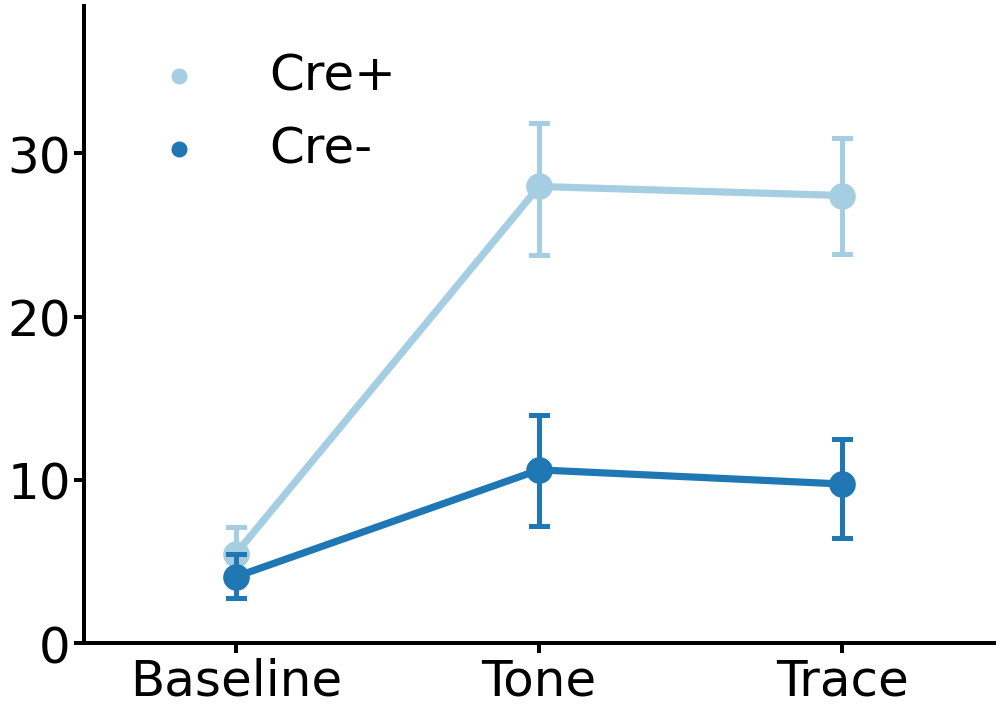

In [4]:
fd.tfc_plot(df_tone_total, xvar='Phase', min_bins=False, tone_squares=False, trace_squares=False,
            shock_line=False, hue='Condition', order=['baseline', 'tone', 'trace'],
            errwidth=5, scale=1, figsize=(14, 10), marker_size=450)

plt.ylim(0,39)
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.set_xticklabels(['Baseline', 'Tone', 'Trace'])
ax.tick_params(labelsize=50)
L = ax.legend(markerscale=.5, fontsize=50)

plt.tight_layout()


In [5]:
import pingouin as pg

In [6]:
pg.mixed_anova(df_tone_total, dv = 'Pct Component Time Freezing', 
               within = 'Phase', between = 'Condition', subject = 'Animal').round(3)

/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Condition,1548.477,1,12,1548.477,15.200,0.002,0.559,NaN
1,Phase,1874.453,2,24,937.227,16.373,0.000,0.577,0.903
2,Interaction,604.790,2,24,302.395,5.283,0.013,0.306,NaN


In [7]:
pg.pairwise_ttests(df_tone_total, dv = 'Pct Component Time Freezing', 
               within = 'Phase', between = 'Condition', subject = 'Animal', padjust='bonf').round(3)

,Contrast,Phase,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Phase,-,baseline,tone,True,True,-3.966,13.0,two-sided,0.002,0.005,bonf,26.079,-1.409
1,Phase,-,baseline,trace,True,True,-4.021,13.0,two-sided,0.001,0.004,bonf,28.468,-1.407
2,Phase,-,tone,trace,True,True,0.260,13.0,two-sided,0.799,1.000,bonf,0.278,0.052
3,Condition,-,Cre+,Cre-,False,True,3.899,12.0,two-sided,0.002,NaN,NaN,16.228,1.951
4,Phase * Condition,baseline,Cre+,Cre-,False,True,0.642,12.0,two-sided,0.533,1.000,bonf,0.511,0.321
5,Phase * Condition,tone,Cre+,Cre-,False,True,3.077,12.0,two-sided,0.010,0.029,bonf,5.372,1.540
6,Phase * Condition,trace,Cre+,Cre-,False,True,3.521,12.0,two-sided,0.004,0.013,bonf,9.71,1.762
